# Análise dos pós-graduandos egressos da UFRN

( Informações gerais da equipe *blablabla* ) **EDITAR**

A [UFRN](http://www.ufrn.br/) (Universidade Federal do Rio Grande do Norte) possui um órgão responsável pelo gerenciamento dos programas de pós-graduação, que é a [Pró-reitoria de Pós-graduação](http://www.ppg.ufrn.br/index.php) (PPG) cujo 
> "desempenha um papel fundamental na expansão e consolidação do Sistema de Pós-graduação no âmbito da Universidade, na pespectiva de contribuir com as demandas da Sociedade Norte-rio-grandense e brasileira, como um importante instrumento de qualificação acadêmica e técnica." [[1]](http://www.ppg.ufrn.br/pagina.php?a=apresentacao#)

O ensino de pós-graduação da UFRN abrange tanto os programas *Stricto sensu* (Mestrado e Doutorado) quanto *Lato sensu* (Especialização e Residências em Saúde e outras áreas do conhecimento).

(ainda to melhorando o texto de intro)

**Perguntas que queremos responder (por ordem de prioridade)**

1. Quantos alunos de pós-graduação vieram de uma graduação anterior na UFRN?
2. Agrupando os programas de pós-graduação em áreas do saber (decidir como fazer isso, caso não haja essa informação no database), quais cursos mais contribuem para o reingresso de seus alunos na pós?
3. É possível traçar um perfil de um graduando que reingressará numa pós? Se sim, qual é o perfil? (essa pergunta talvez não seja tão interessante, buscar respondê-la caso haja tempo)

# Importando as bibliotecas

In [54]:
# importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Analisando o grupo http://dados.ufrn.br/group/ensino

In [55]:
# dados abertos ufrn
# http://dados.ufrn.br/

# urls dos dados
alunos_2016_url = 'http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/7d2fa5b3-743f-465f-8450-91719b34a002/download/discentes-2016'
alunos_2015_url = 'http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/e2b5b843-4f58-497e-8979-44daf8df8f94/download/discentes-2015'
alunos_2014_url = 'http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/6c23a430-9a7c-4d0f-9602-1d5d97d40e6a/download/discentes-2014'
alunos_2013_url = 'http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/dba208c2-822f-4e26-adc3-b61d4cb110b6/download/discentes-2013'
alunos_2012_url = 'http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/fc283aa9-61a7-4cf0-91fb-c403c0817b48/download/discentes-2012'
alunos_2011_url = 'http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/2bb3dec9-7f23-434c-a179-21515f91abc8/download/discentes-2011'
alunos_2010_url = 'http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/5fc61f78-19b4-4020-9f3c-c298cb8a63aa/download/discentes-2010'
alunos_2009_url = 'http://dados.ufrn.br/dataset/554c2d41-cfce-4278-93c6-eb9aa49c5d16/resource/861b96a8-5304-4e6a-a8c4-068533ec7cb9/download/discentes-2009'

alunos_url = {alunos_2016_url, alunos_2015_url, alunos_2014_url, 
              alunos_2013_url, alunos_2012_url, alunos_2011_url, 
              alunos_2010_url, alunos_2009_url}

bolsas_url = 'http://dados.ufrn.br/dataset/81608a4d-c76b-4758-a8d8-54be32209833/resource/d21c94fe-22ba-4cf3-89db-54d8e739c567/download/bolsistas-de-iniciacao-cientifica.csv'

# alunos (2009 - 2016)
alunos = []
   
for i in alunos_url:
    alunos.append(pd.read_csv(i, sep=';'))

# bolsas de iniciação científica
bolsas = pd.read_csv(bolsas_url, sep=';')
#criar um dataframe com todas as listas
alunos_all = pd.concat(alunos)

In [50]:
alunos_all

,matricula,nome_discente,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status,sigla_nivel_ensino,nivel_ensino,id_curso,nome_curso,modalidade_educacao,id_unidade,nome_unidade,id_unidade_gestora,nome_unidade_gestora
0,2.014000e+09,A,2014,1.0,ALUNO ESPECIAL,ESPECIAL,ATIVO,G,GRADUAÇÃO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.014338e+09,AARON LEONEL DE ALMEIDA DAMASCENO,2014,2.0,PROCESSO SELETIVO,REGULAR,CANCELADO,T,TÉCNICO,4746233.0,TECNICO EM AGROPECUARIA SUBSEQUENTE,PRESENCIAL,351.0,ESCOLA AGRÍCOLA DE JUNDIAÍ,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
2,2.014352e+09,ABDENIO VICTOR PEREIRA DA SILVA,2014,2.0,PROCESSO SELETIVO,REGULAR,CANCELADO,T,TÉCNICO,108837709.0,CURSO TÉCNICO EM MANUTENÇÃO E SUPORTE EM INFOR...,PRESENCIAL,205.0,ESCOLA DE SAÚDE,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
3,2.014048e+09,ABDIAS MARTINS DE CASTRO NETO,2014,1.0,SiSU,REGULAR,CANCELADO,G,GRADUAÇÃO,10320810.0,CIÊNCIAS E TECNOLOGIA,PRESENCIAL,4885.0,ESCOLA DE CIÊNCIAS E TECNOLOGIA,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
4,2.014323e+09,ABDI SADDAI COSTA DE ARAÚJO,2014,1.0,PROCESSO SELETIVO,REGULAR,CANCELADO,T,TÉCNICO,96054058.0,CURSO TÉCNICO DA METRÓPOLE DIGITAL,SEMI-PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
5,2.014066e+09,ABDOM DOS SANTOS CANINDÉ,2014,1.0,SiSU,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,10320810.0,CIÊNCIAS E TECNOLOGIA,PRESENCIAL,4885.0,ESCOLA DE CIÊNCIAS E TECNOLOGIA,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
6,2.014101e+09,ABDON SILVA RIBEIRO DA CUNHA,2014,1.0,SELEÇÃO DE PÓS-GRADUAÇÃO,REGULAR,ATIVO,D,DOUTORADO,315765.0,DOUTORADO EM ADMINISTRAÇÃO,PRESENCIAL,74.0,PROGRAMA DE PÓS-GRADUAÇÃO EM ADMINISTRAÇÃO,443.0,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS
7,2.014129e+09,ABELARDO MONTEIRO BEZERRA DE MELO NETO,2014,2.0,ALUNO ESPECIAL POS-GRADUACAO,ESPECIAL,CANCELADO,E,MESTRADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2.014037e+09,ABEL MENDONCA ALVES,2014,1.0,SiSU,REGULAR,CANCELADO,G,GRADUAÇÃO,2000056.0,MEDICINA,PRESENCIAL,441.0,CENTRO DE CIÊNCIAS DA SAÚDE,441.0,CENTRO DE CIÊNCIAS DA SAÚDE
9,2.014313e+09,ABEL VENANCIO DO VALE,2014,1.0,PROCESSO SELETIVO,REGULAR,CANCELADO,T,TÉCNICO,96054058.0,CURSO TÉCNICO DA METRÓPOLE DIGITAL,SEMI-PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE


# Filtrando dados

In [56]:
#filtra os alunos de graduação
grad = alunos_all.loc[ alunos_all['nivel_ensino'] == 'GRADUAÇÃO'].drop_duplicates(["nome_discente"], keep='last')

In [57]:
#filtra os alunos de mestrado
mest_all = alunos_all.loc[ alunos_all['nivel_ensino'] == 'MESTRADO']

In [58]:
#verifica a interseção entre nomes de alunos nas duas tabelas acima
#dout_ufrn = set.intersection(set(dout_all['nome_discente']), set(grad['nome_discente'])) outro jeito de fazer

#dout_ufrn = pd.merge(dout_all,grad, how='inner', on=['nome_discente'])

mest_ufrn = pd.concat([dout_all, grad])

mest_ufrn = mest_ufrn[mest_ufrn["nome_discente"].duplicated()]

mest_ufrn = mest_ufrn.drop_duplicates(["nome_discente"], keep='last')

In [91]:
mest_ufrn = pd.concat([mest_all, grad])

#map(lambda x: x.upper(), mest_ufrn["nome_discente"])

mest_ufrn = mest_ufrn[mest_ufrn["nome_discente"].duplicated()]

mest_ufrn = mest_ufrn.drop_duplicates(["nome_discente"], keep='last')


In [92]:
print(len(mest_all))
print(len(grad))
print(len(mest_ufrn))

16972
57805
6241


In [59]:
#filtra os alunos de doutorado
dout_all = alunos_all.loc[ alunos_all['nivel_ensino'] == 'DOUTORADO']

In [78]:
#verifica a interseção entre nomes de alunos nas duas tabelas acima
#dout_ufrn = set.intersection(set(dout_all['nome_discente']), set(grad['nome_discente'])) outro jeito de fazer

#dout_ufrn = pd.merge(dout_all,grad, how='inner', on=['nome_discente'])

dout_ufrn = pd.concat([dout_all, grad])

dout_ufrn = dout_ufrn[dout_ufrn["nome_discente"].duplicated()]

dout_ufrn = dout_ufrn.drop_duplicates(["nome_discente"], keep='last')

In [83]:
print(len(dout_all))
print(len(grad))
print(len(dout_ufrn))

16972
57805
1279


[5275, 1279]

## Alunos que fazem/fizeram doutorado vindos da UFRN

In [98]:
mest_all["nome_unidade_gestora"].value_counts()

CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES     1857
CENTRO DE TECNOLOGIA                           1704
CENTRO DE CIÊNCIAS EXATAS E DA TERRA           1650
CENTRO DE CIÊNCIAS DA SAÚDE                    1292
CENTRO DE CIÊNCIAS SOCIAIS APLICADAS            947
CENTRO DE BIOCIÊNCIAS                           752
UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE     487
CENTRO DE EDUCAÇÃO                              327
CENTRO DE  ENSINO SUPERIOR DO SERIDÓ             90
Name: nome_unidade_gestora, dtype: int64

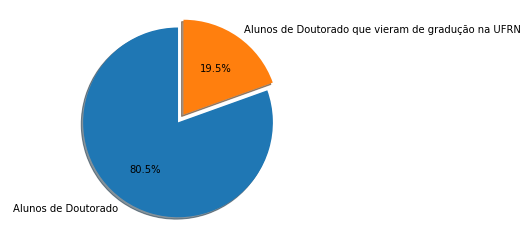

In [80]:
#armazena a quantidade de alunos no doutorado e quais deles vieram de alguma graduação
values = [dout_all.shape[0],dout_ufrn.shape[0]]

#cria um gráfico para mostrar a proporção de alunos que fizeram a graduação e que fizeram/fazem doutorado
fig1, ax1 = plt.subplots()
labels = 'Alunos de Doutorado', 'Alunos de Doutorado que vieram de gradução na UFRN'
explode = (0, 0.1)
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

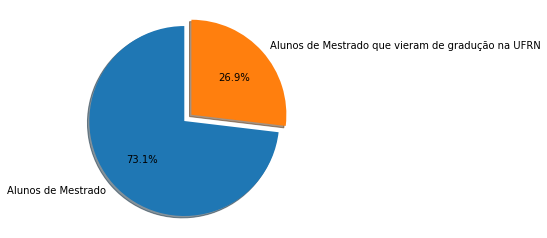

In [93]:
values = [mest_all.shape[0],mest_ufrn.shape[0]]

#cria um gráfico para mostrar a proporção de alunos que fizeram a graduação e que fizeram/fazem doutorado
fig1, ax1 = plt.subplots()
labels = 'Alunos de Mestrado', 'Alunos de Mestrado que vieram de gradução na UFRN'
explode = (0, 0.1)
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

## Cursos que mais tem alunos indo para uma pós-graduação

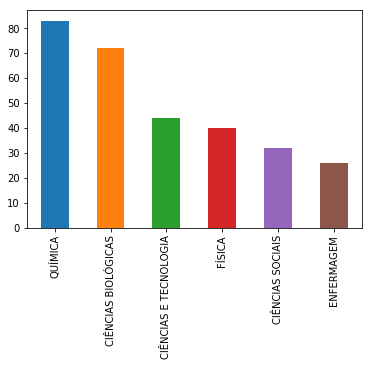

In [170]:
#pega a interseção entre os graduandos e os doutorandos porém agora em uma tabela pandas,
#pois assim podemos pegar os cursos.
#mostra os cursos que mais tem alunos na pós graduação
dout_cursos = pd.merge(dout_all,grad, how='inner', on=['nome_discente']).drop_duplicates(["nome_discente"], keep='last')
dout_cursos['nome_curso_y'].value_counts()[0:6].plot(kind='bar')

## Perfil do aluno que faz doutorado

In [171]:
#faz uma interseção pegando os alunos que fazem doutorado, vindos da UFRN, com aqueles que tem bolsas de iniciação cientifica
bolsas.rename(columns={'discente': 'nome_discente'}, inplace=True)
perfil = pd.merge(dout_cursos,bolsas, how='inner', on=['nome_discente']).drop_duplicates(["nome_discente"], keep='last')
dout_bolsa = perfil.shape[0]
perfil_dout = [len(dout_ufrn),dout_bolsa]

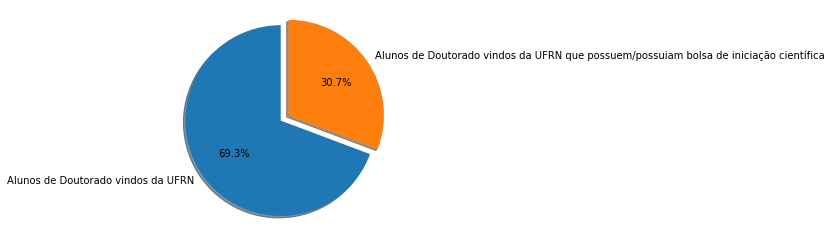

In [172]:
#cria um gráfico para mostrar a proporção de alunos que tem/tinham bolsas de iniciação ciêntifica
fig1, ax1 = plt.subplots()
labels = 'Alunos de Doutorado vindos da UFRN', 'Alunos de Doutorado vindos da UFRN que possuem/possuiam bolsa de iniciação científica'
explode = (0, 0.1)
ax1.pie(perfil_dout, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

## TODO

 * Gerar gráficos dos pós-graduandos no decorrer dos anos
 * Gerar gráficos dos pós-graduandos por área
 * Analisar o BTI em particular
 * Verificar quais cursos mais 'contribuem' para a pós relativa à tecnologia (filtar as pós UFRN por área >> )